#                     Projeto Final CDD- Prever a nota de um filme no IMDB

<img src="https://img.buzzfeed.com/buzzfeed-static/static/2015-11/2/11/enhanced/webdr05/anigif_enhanced-29363-1446481605-18.gif?downsize=800:*&output-format=auto&output-quality=auto" width=200 heigth=200 \>

André Vital Tavernaro


Daniel Zelv Freund


Guilherme Batista

## LEITURA DOS DADOS

In [740]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import norm, probplot
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
import json

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

In [741]:
### Função utilizada para fazer a regressão com constante adicionada
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

In [742]:
def verificador_nulo(dataframe):
    for e in dataframe.columns.tolist():
        valores_nulos = len(dataframe[dataframe[e]==0])
        if valores_nulos > 0:
            print('{0} {1}' .format(valores_nulos, e))

In [743]:
dados_filmes= pd.read_csv("tmdb_5000_movies.csv")

#### Tiramos os valores nulos do dataframe da coluna budget

In [744]:
dados_filmes.tail(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6
4801,0,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7
4802,0,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,25975,"[{""id"": 1523, ""name"": ""obsession""}, {""id"": 224...",en,My Date with Drew,Ever since the second grade when he first saw ...,1.929883,"[{""name"": ""rusty bear entertainment"", ""id"": 87...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2005-08-05,0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,My Date with Drew,6.3,16


## Construção e Limpeza do Dataframe

In [745]:
dados_novos = dados_filmes[["title","runtime","budget","revenue", "vote_average", 
                            "vote_count", "popularity","genres",'release_date']].copy()

In [746]:
verificador_nulo(dados_novos)

35 runtime
1037 budget
1427 revenue
63 vote_average
62 vote_count
1 popularity


In [747]:
dados_novos.drop(dados_novos[dados_novos["budget"]==0].index,inplace=True)
dados_novos.drop(dados_novos[dados_novos["revenue"]==0].index,inplace=True)

In [748]:
verificador_nulo(dados_novos)

2 vote_average
2 vote_count


In [749]:
# mediana = dados_novos.revenue.median()
# dados_novos = dados_novos.replace(0, mediana)

Apagar os valores nulos de dados_novos (vote_average e vote_count abaixaram a precisão do calculador)

#### Criação de colunas com o nome dos generos, sendo 1 para quando o filme é daquela categoria e 0 para quando não é , isso foi feito para tirar a coluna genre

In [750]:
genres = set()
for x in dados_novos['genres']:
    for g in json.loads(x):
        genres.add(g["name"])

#### Criacão do novo dataframe incluindo as novas colunas de gênero

In [751]:
def extrai_generos(item):
    generos = {'c_' + x: 0 for x in ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 
                              'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 
                              'History', 'Horror', 'Music', 'Mystery', 'Romance', 
                              'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']}
    for g in json.loads(item):
        generos['c_' + g['name']] += 1
    return generos

dados_generos = pd.DataFrame(list(dados_novos['genres'].apply(extrai_generos).values))

dados_novos_junto = dados_novos.join(dados_generos)

dados_novos_junto.set_index("title",inplace=True)

dados_novos_junto.drop(columns= "genres", inplace=True)

#### Criação de novas colunas que contém o mês, ano, e dia , cada uma em sua própia coluna no dataframe 

In [752]:
dados_novos_junto['year'] , dados_novos_junto['month'] , dados_novos_junto['day'] = dados_novos_junto['release_date'].str.split('-',2).str
dados_novos_junto['year'] = pd.to_numeric(dados_novos_junto['year'])
dados_novos_junto['month'] = pd.to_numeric(dados_novos_junto['month'])
dados_novos_junto['day']  = pd.to_numeric(dados_novos_junto['day'] )

In [753]:
dados_novos_junto.tail(3)

,runtime,budget,revenue,vote_average,vote_count,popularity,release_date,c_Action,c_Adventure,c_Animation,...,c_Mystery,c_Romance,c_Science Fiction,c_TV Movie,c_Thriller,c_War,c_Western,year,month,day
title,,,,,,,,,,,,,,,,,,,,,
Cure,111.0,20000,99000,7.4,63,0.212443,1997-11-06,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997,11,6
Primer,77.0,7000,424760,6.9,658,23.307949,2004-10-08,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004,10,8
El Mariachi,81.0,220000,2040920,6.6,238,14.269792,1992-09-04,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1992,9,4


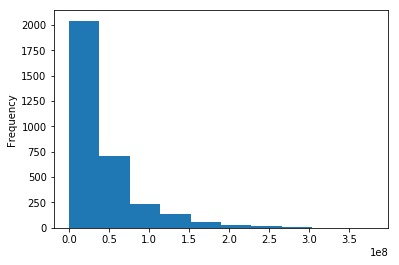

In [754]:
dados_novos_junto['budget'].plot.hist();

In [755]:
dados_novos_junto.drop(dados_novos_junto[dados_novos_junto['budget'] > dados_novos_junto['budget'].quantile(q=0.98)].index,inplace=True)

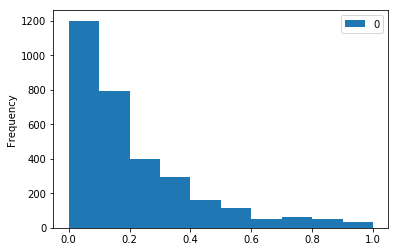

In [756]:
import pandas as pd
from sklearn import preprocessing
# Create x, where x the 'scores' column's values as floats
x = dados_novos_junto[['budget']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)
df_normalized.plot.hist();

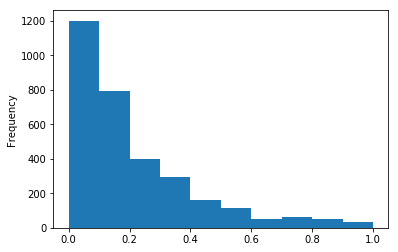

In [757]:
dados_novos_junto.budget = x_scaled
dados_novos_junto.budget.plot.hist()

## Cálculo e acuracia

**Dicionário de dados:**


Variável | Descrição
:---:|---:
title | Título do filme
runtime | Tempo de filme
budget | Orçamento
revenue | Receita
vote_average | Média dos votos
vote_count | Número de votos das pessoas
popularity | Popularidade
genres | Os diferentes gêneros de filme
c_Action | 0: não pertence; 1: pertence (gênero)
c_Adventure | 0: não pertence; 1: pertence (gênero)
c_Animation | 0: não pertence; 1: pertence (gênero)
c_Comedy | 0: não pertence; 1: pertence (gênero)
c_Crime | 0: não pertence; 1: pertence (gênero)
c_Documentary | 0: não pertence; 1: pertence (gênero)
c_Drama | 0: não pertence; 1: pertence (gênero)
c_Family | 0: não pertence; 1: pertence (gênero)
c_Fantasy | 0: não pertence; 1: pertence (gênero)
c_Foreign | 0: não pertence; 1: pertence (gênero)
c_History | 0: não pertence; 1: pertence (gênero)
c_Horror | 0: não pertence; 1: pertence (gênero)
c_Music | 0: não pertence; 1: pertence (gênero)
c_Mystery | 0: não pertence; 1: pertence (gênero)
c_Romance | 0: não pertence; 1: pertence (gênero)
c_Science Fiction | 0: não pertence; 1: pertence (gênero)
c_TV Movie | 0: não pertence; 1: pertence (gênero)
c_Thriller | 0: não pertence; 1: pertence (gênero)
c_War | 0: não pertence; 1: pertence (gênero)
c_Western | 0: não pertence; 1: pertence (gênero)
ano | ano em que o filme foi lançado
mês | mês em que o filme foi lançado
dia | dia em que o filme foi lançado

### Verificando e limpando os  valores nulos e inválidos das variáveis em certa coluna

In [758]:
df = dados_novos_junto
df = df.dropna()

## Com a ajuda do comando Describe, poderemos analisar fatores importantes do Dataframe


 

In [759]:
dados_novos_junto.describe()

,runtime,budget,revenue,vote_average,vote_count,popularity,c_Action,c_Adventure,c_Animation,c_Comedy,...,c_Mystery,c_Romance,c_Science Fiction,c_TV Movie,c_Thriller,c_War,c_Western,year,month,day
count,3164.000000,3164.000000,3.164000e+03,3164.000000,3164.000000,3164.000000,2507.000000,2507.000000,2507.000000,2507.000000,...,2507.000000,2507.000000,2507.000000,2507.0,2507.000000,2507.000000,2507.000000,3164.000000,3164.000000,3164.000000
mean,110.262010,0.211794,1.083526e+08,6.304362,903.080910,27.843907,0.295174,0.209813,0.063422,0.353410,...,0.086957,0.168728,0.136418,0.0,0.302353,0.037894,0.014759,2001.490834,6.997788,15.495891
std,20.673698,0.209538,1.520875e+08,0.876186,1280.867937,35.107713,0.456212,0.407256,0.243770,0.478124,...,0.281828,0.374586,0.343300,0.0,0.459369,0.190978,0.120610,13.338118,3.376613,8.477247
min,41.000000,0.000000,5.000000e+00,0.000000,0.000000,0.019984,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1916.000000,1.000000,1.000000
25%,96.000000,0.057143,1.678929e+07,5.800000,170.750000,10.232095,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1998.000000,4.000000,9.000000
50%,107.000000,0.142857,5.318463e+07,6.300000,453.000000,19.943755,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2005.000000,7.000000,15.000000
75%,120.000000,0.286429,1.366426e+08,6.900000,1067.250000,36.168729,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,2010.000000,10.000000,23.000000
max,338.000000,1.000000,1.513529e+09,8.500000,13752.000000,875.581305,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,2016.000000,12.000000,31.000000


## Separação das  variáveis

Obtendo as variáveis resposta e preditora:

-Variável resposta (Y) , ou seja , as notas do site IMDB

-Variável preditora (X) , ou seja , todas as colunas que serão usadas para prever as notas dos filmes

In [760]:
Y = df[ "vote_average"]

In [761]:
X = df[["runtime","budget","revenue","vote_count", "popularity","c_Action", "c_Adventure","c_Animation","c_Comedy","c_History",
        "c_Horror","c_Music","c_Mystery","c_Romance","c_Science Fiction","c_TV Movie","c_Thriller","c_War","c_Western","month","year","day"]]

### Regressão

In [762]:
results = regress(X,Y)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           vote_average   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     79.87
Date:                Mon, 12 Nov 2018   Prob (F-statistic):          1.90e-259
Time:                        23:43:57   Log-Likelihood:                -2492.4
No. Observations:                2507   AIC:                             5029.
Df Residuals:                    2485   BIC:                             5157.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                18.6573      3.025      6.168      0.000      12.726      24.589
runtime               0.0139      0.001     20.183      0.000       0.013       0.015
budget               -1.1958      0.088    -13.654      0.000      -1.368      -1.024
revenue            1.322e-10   1.36e-10      0.974      0.330   -1.34e-10    3.98e-10
vote_count            0.0003   1.68e-05     17.179      0.000       0.000       0.000
popularity            0.0006      0.001      1.202      0.230      -0.000       0.002
c_Action              0.0418      0.035      1.209      0.227      -0.026       0.110
c_Adventure           0.0188      0.037      0.502      0.616      -0.055       0.092
c_Animation           0.1081      0.059      1.842      0.066      -0.007       0.223
c_Comedy              0.0203      0.031      0.645      0.519      -0.041       0.082
c_History             0.0937      0.068      1.371      0.171      -0.040       0.228
c_Horror             -0.0562      0.048     -1.180      0.238      -0.150       0.037
c_Music              -0.1572      0.076     -2.067      0.039      -0.306      -0.008
c_Mystery             0.0241      0.050      0.486      0.627      -0.073       0.121
c_Romance            -0.0638      0.038     -1.688      0.092      -0.138       0.010
c_Science Fiction     0.0031      0.041      0.075      0.940      -0.077       0.083
c_TV Movie         6.704e-17   3.71e-17      1.807      0.071   -5.72e-18     1.4e-16
c_Thriller           -0.0186      0.034     -0.542      0.588      -0.086       0.049
c_War                 0.0744      0.073      1.013      0.311      -0.070       0.218
c_Western            -0.1104      0.110     -1.003      0.316      -0.326       0.106
month                 0.0225      0.004      5.724      0.000       0.015       0.030
year                 -0.0070      0.002     -4.694      0.000      -0.010      -0.004
day                  -0.0020      0.002     -1.246      0.213      -0.005       0.001
==============================================================================
Omnibus:                      235.306   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              410.043
Skew:                          -0.654   Prob(JB):                     9.13e-90
Kurtosis:                       4.488   Cond. No.                     2.14e+25
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.37e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Criação do novo dataframe com variáveis releventes

#### Adotamos um ALFA de 5%, então só vamos usar na análise as variáveis  que possuem um P>T maior que o ALFA 

In [763]:
X = df[["runtime", "budget", "revenue", "vote_count", "popularity", "month", "year"]]

#### Separando o dataframe em teste e treinamento

In [764]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=RANDOM_SEED)

 #### Aplicando o modelo de regressão linear

In [765]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()       #cria
model.fit(X_train, y_train)        #treina 
y_pred = model.predict(X_test)      #testa 

resultrl = 1 - mean_squared_error(y_test, y_pred) / np.var(y_test)
print('a margem de acerto do modelo de regressão linear é de {0}%'.format(resultrl.round(2)*100))

a margem de acerto do modelo de regressão linear é de 43.0%


#### Aplicando o modelo RandomForest

In [766]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor()       #cria
model.fit(X_train, y_train)        #treina 
y_pred = model.predict(X_test)      #testa 

resultrf = 1 - mean_squared_error(y_test, y_pred) / np.var(y_test)
print('a margem de acerto do modelo RandomForest é de {0}%'.format(resultrf.round(2)*100))

a margem de acerto do modelo RandomForest é de 49.0%
